In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/google_drive')

# move working directory to file location
%cd 'google_drive/MyDrive/Engineering_Hydrology_Notebooks/content/notebooks/Introduction'


# import a few useful libraries
import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt

Mounted at /content/google_drive
/content/google_drive/MyDrive/Engineering_Hydrology_Notebooks/content/notebooks/Introduction


# Example: Clausius-Clapeyron Equation

## Introduction

This notebook is an interactive development environment (IDE) where you can run Python code to do calculations, numerical simuluation, and much more.

For this example, we'll plot the atmospheric water vapour pressure for a range of air temperatures.

In [2]:
# this cell is for code, you can change the cell type in the toolbar at the top of this window.

# set the range of temperatures we're interested in
# calculating the vapour pressure

# the numpy (np) library has a 'linspace' function that
# creates an array starting at -5 and ending at 30 with 500 steps
temperature_range = np.linspace(-5, 30, 500)

### Errors

Did you get an error that says `NameError: name 'np' is not defined`?

Recall that code cells must be executed in order to load the requisite libraries, variables, etc. into memory.  The error above suggests the very first cell in this notebook wasn't executed, so the numpy library is not yet accessible in the variable `np`.  Note the line `import numpy as np` loads the numpy library and makes its many functions available from the variable `np`.

In [3]:
temperature_range

array([-5.00000000e+00, -4.92985972e+00, -4.85971944e+00, -4.78957916e+00,
       -4.71943888e+00, -4.64929860e+00, -4.57915832e+00, -4.50901804e+00,
       -4.43887776e+00, -4.36873747e+00, -4.29859719e+00, -4.22845691e+00,
       -4.15831663e+00, -4.08817635e+00, -4.01803607e+00, -3.94789579e+00,
       -3.87775551e+00, -3.80761523e+00, -3.73747495e+00, -3.66733467e+00,
       -3.59719439e+00, -3.52705411e+00, -3.45691383e+00, -3.38677355e+00,
       -3.31663327e+00, -3.24649299e+00, -3.17635271e+00, -3.10621242e+00,
       -3.03607214e+00, -2.96593186e+00, -2.89579158e+00, -2.82565130e+00,
       -2.75551102e+00, -2.68537074e+00, -2.61523046e+00, -2.54509018e+00,
       -2.47494990e+00, -2.40480962e+00, -2.33466934e+00, -2.26452906e+00,
       -2.19438878e+00, -2.12424850e+00, -2.05410822e+00, -1.98396794e+00,
       -1.91382766e+00, -1.84368737e+00, -1.77354709e+00, -1.70340681e+00,
       -1.63326653e+00, -1.56312625e+00, -1.49298597e+00, -1.42284569e+00,
       -1.35270541e+00, -

This cell is for "markdown" which is an easy way to format text nicely.  [More information on markdown can be found here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Let's use markdown to write the Clausius-Clapeyron equation nicely:



## Clausius-Clapeyron Equation

$$\frac{de_s}{dT} = \frac{L_v(T)e_s}{R_v T^2}$$

Or, using an approximation:

$$e_s(T) = 0.611 \cdot exp\left( \frac{17.3 \cdot T_s}{T_s + 237.3} \right) $$

Now, we can write this as a function in Python:

In [4]:
def calculate_saturation_vapor_pressure(T):
    """
    Given T (temperature) as an input in Kelvin,
    return the saturation vapour pressure of air.
    """
    return 0.611 * math.exp((17.3 * T)/(T + 237.3))


In [5]:
def calculate_blackbody_radiation(T):
    """
    Given T (temperature) as an input in Kelvin,
    return the saturation vapour pressure of air.
    """
    sigma=5.670374419e-8
    return sigma*(T^4)

In [6]:
def calculate_greybody_radiation(T,emiss):
    """
    Given T (temperature) as an input in Kelvin,
    return the saturation vapour pressure of air.
    """
    sigma=5.670374419e-8
    return sigma*emiss*(T^4)

In [7]:
calculate_blackbody_radiation(5500)

0.00031164377806824

Stefan-Bolzmann Constant:
$\sigma = 5.670374419×10^8 Wm^{−2}⋅K^{−4}$

In [8]:
def calculate_saturation_vapor_pressure_C(Tc):
    """
    Given T (temperature) as an input in Kelvin,
    return the saturation vapour pressure of air.
    """
    T=Tc+273;
    e = 0.611 * math.exp((17.3 * T/(T + 237.3)))
    return e

In [9]:
def calculate_dewpoint_temperature(e):
    """
    Given e (temperature) as an input in Kelvin,
    return the saturation vapour pressure of air.
    """
    return 0.611 * math.exp((17.3 * T)/(T + 237.3))

In [10]:
# Now, calculate the saturation vapour pressure for the range of temperature we defined above
temp = 10
# create an empty array to store the vapour pressures we will calculate
vapour_pressures = []
# loop through the range of temperatures we defined above
for t in temperature_range:
    sat_vapour_pressure = calculate_saturation_vapor_pressure(t)
    vapour_pressures.append(sat_vapour_pressure)

Text(0, 0.5, 'Saturation Vapour Pressure (kPa)')

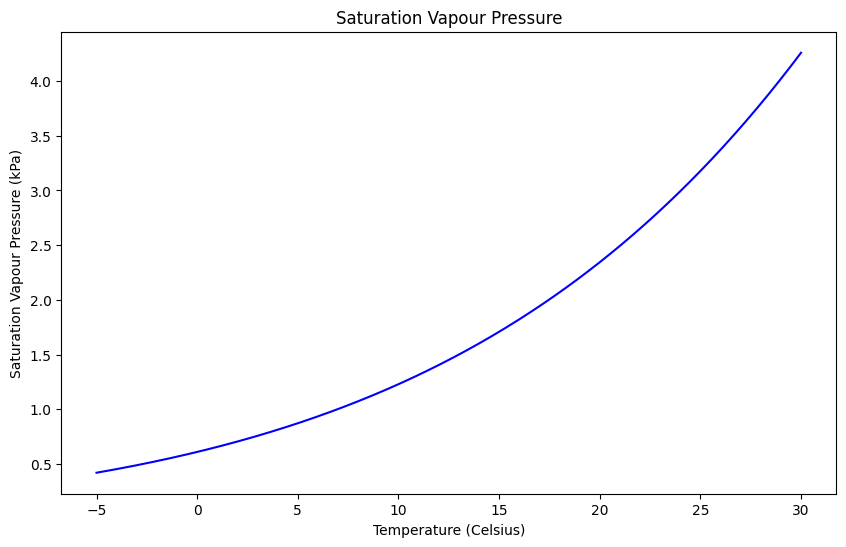

In [11]:
# now plot the result
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(temperature_range, vapour_pressures, 'b-')
ax.set_title('Saturation Vapour Pressure')
ax.set_xlabel('Temperature (Celsius)')
ax.set_ylabel('Saturation Vapour Pressure (kPa)')